In [1]:
#############################################################################
#   _________ ____________  ___                                             #
#  /   _____//  _____/\   \/  /  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  #
#  \_____  \/   \  ___ \     /   THE E(X)TENDED (S)ELFISH (G)ENE ALGORITHM  #
#  /        \    \_\  \/     \   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  #
# /_________/\________/___/\  \  https://github.com/squillero/sgx           #
#                           \_/                                             #
#                                                                           #
# A quick 'n dirty versatile population-less evolutionary optimizer loosely #
# inspired by a cool interpretation of the Darwinian theory.                #
#                                                                           #
#############################################################################

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import sys
sys.path += ['../src']
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', datefmt='%H:%M:%S')
logging.getLogger().setLevel(logging.INFO)

In [3]:
from itertools import product
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

import sgx

<ipython-input-3-20e1ed0d299b>:6: RuntimeWarning: All debug checks are active, performances are significantly impaired.
  import sgx


In [4]:
results = pd.DataFrame(columns=['Size', 'run', 'Generations'])

In [5]:
for run, problem_size in tqdm(list(product(range(10), range(10, 101, 10)))):
    fitness_function = sgx.fitness.FitnessFunction(lambda i: i.count('1'), best_fitness=problem_size, type_=sgx.fitness.Scalar)

    genome = sgx.t.Genome([sgx.allele.Categorical("01") for _ in range(problem_size)])
    species = sgx.t.Species(genome=genome, fitness_function=fitness_function)
    archive = sgx.algorithms.sg(species, max_generation=100000, progress='')
    data = {'Size': float(problem_size), 'run': run, 'Generations': float(archive.age)}
    results = results.append(data, ignore_index=True)

results.sort_values('Size', inplace=True, ignore_index=True)

<AxesSubplot:xlabel='Size', ylabel='Generations'>

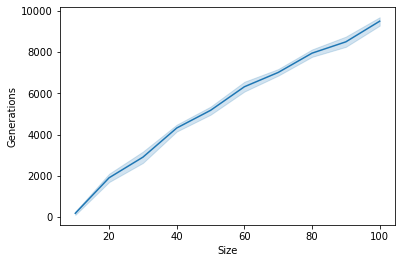

In [6]:
sns.lineplot(data=results, x='Size', y='Generations')